# Example script for IDD


In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Resistance in a two strain model (6.2)
(Resistant vs Sensitive strain)


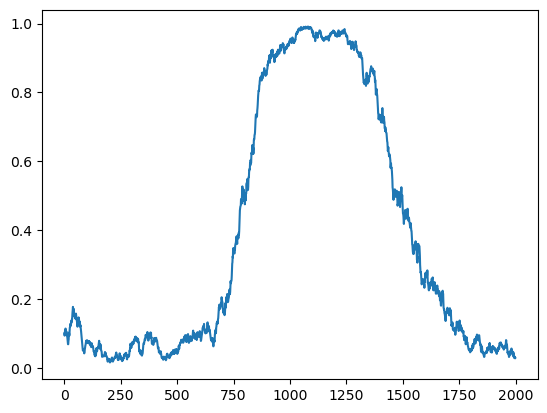

In [69]:

mu = 0.001          #mutation rate
w_nodrug = 0.99     #fitness cost of carrying mutation
w_drug = 1.02       #fitness benefit when drug is administered
N = 2000            #population size (for stochastic effects)
trange= 2000        #time steps
f0 = mu/(1-w_nodrug)    #initial population ratio (based on preexistence frequency)
stochastic = True

t = np.array(range(trange))
f = np.ones(trange)
sel_effect = np.ones(trange-1)
mut_effect = np.ones(trange-1)
f[0] = f0
w = w_nodrug
for ft in range(trange-1):
        
        if ft == int(trange/3): #start drug administration 
            w = w_drug        
        if ft == int(2*trange/3): #end drug administration 
            w = w_nodrug
        
        f[ft+1] = (1-mu)*f[ft]+mu*(1-f[ft])
        mut_effect[ft] = np.abs(f[ft+1]-f[ft])
        new_f =  f[ft+1]*w/(w*f[ft+1]+(1-f[ft+1]))
        sel_effect[ft] = np.abs(new_f-f[ft])
        f[ft+1] = new_f
        if stochastic:
            N_r = np.random.binomial(N, f[ft+1])
            f[ft+1] = N_r/N


plt.plot(t,f)

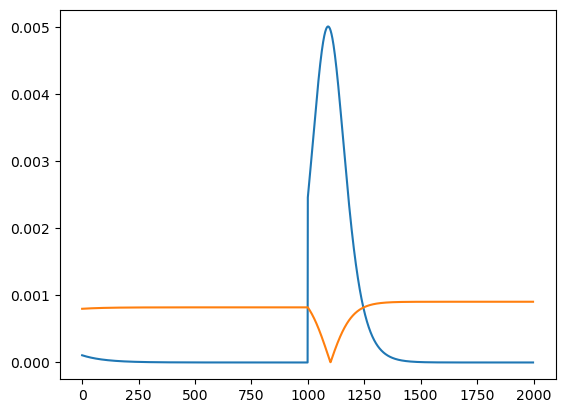

In [60]:
#show selection and mutation effect
plt.plot(sel_effect) #blue
plt.plot(mut_effect) #orange